<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [390]:
'''from google.colab import drive
drive.mount('content/drive')'''

"from google.colab import drive\ndrive.mount('content/drive')"

In [391]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os


review_data = load_files(r"/content/drive/My Drive/movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [392]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [393]:
MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [394]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(50, activation='sigmoid'),
    keras.layers.Dense(30, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid'),
])

In [395]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [396]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=100, batch_size=200, verbose=0,
          callbacks=[cb_checkpoint, cb_early_stopping])



Epoch 00001: val_loss improved from inf to 2.03228, saving model to ./model/01-2.0323.hdf5

Epoch 00002: val_loss improved from 2.03228 to 1.81603, saving model to ./model/02-1.8160.hdf5

Epoch 00003: val_loss improved from 1.81603 to 1.64631, saving model to ./model/03-1.6463.hdf5

Epoch 00004: val_loss improved from 1.64631 to 1.50517, saving model to ./model/04-1.5052.hdf5

Epoch 00005: val_loss improved from 1.50517 to 1.38360, saving model to ./model/05-1.3836.hdf5

Epoch 00006: val_loss improved from 1.38360 to 1.27804, saving model to ./model/06-1.2780.hdf5

Epoch 00007: val_loss improved from 1.27804 to 1.18712, saving model to ./model/07-1.1871.hdf5

Epoch 00008: val_loss improved from 1.18712 to 1.10981, saving model to ./model/08-1.1098.hdf5

Epoch 00009: val_loss improved from 1.10981 to 1.04492, saving model to ./model/09-1.0449.hdf5

Epoch 00010: val_loss improved from 1.04492 to 0.99104, saving model to ./model/10-0.9910.hdf5

Epoch 00011: val_loss improved from 0.99104

20/20 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5098

Accuracy: 0.5098


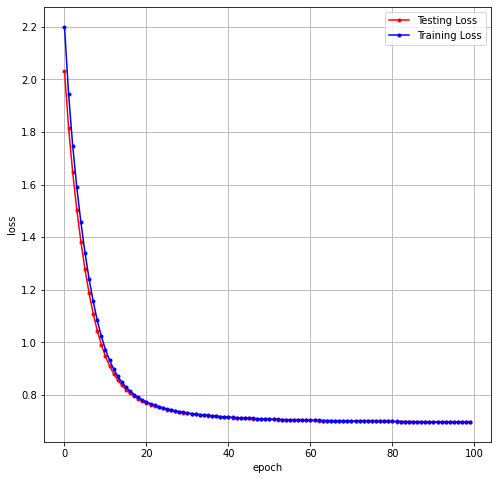

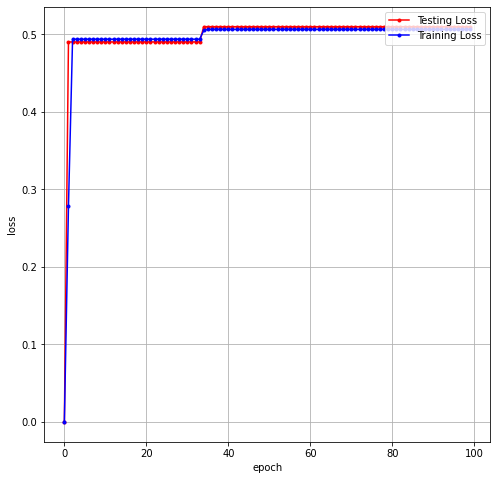

In [397]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_loss))
plt.figure(figsize=(8, 8)) # 그래프 사이즈 조절
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testing Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Training Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.figure(figsize=(8, 8)) # 그래프 사이즈 조절
plt.plot(x_len, y_vacc, marker='.', c='red', label="Testing Loss")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Training Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [398]:
test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

print('\n테스트 정확도:', test_acc)
print('\n', test_loss)

45/45 - 0s - loss: 0.6977 - accuracy: 0.5063

테스트 정확도: 0.5063291192054749

 0.6977323889732361


In [399]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

0

In [400]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [401]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def regularization(u,v):
  u = u.reshape(input_size * hidden1_dim)
  v = v.reshape(hidden1_dim * output_dim)

  u = np.sum(u*u)
  v = np.sum(v*v)

  reg = (u + v ) / (2 * ((1500 * hidden1_dim) + (hidden1_dim * output_dim))) * lamda

  return reg

In [402]:
'''import random

# layers dimension & array
input_train = X_train.T
train_num = 1422
test_num = 610
input_size = 1500
hidden1_dim = 30
output_dim = 1

hidden_layer1 = np.empty((hidden1_dim), dtype=float)
output_layer = np.empty((output_dim), dtype=float)


# parameters initialization
weight_u = np.empty((input_size * hidden1_dim), dtype=float)
weight_v = np.empty((hidden1_dim * output_dim), dtype=float)

for i in range(input_size * hidden1_dim):
  weight_u[i] = random.random() * 0.1

for i in range(hidden1_dim * output_dim):
  weight_v[i] = random.random() * 0.1

weight_u = weight_u.reshape(input_size, hidden1_dim)
weight_v = weight_v.reshape(hidden1_dim, output_dim)


# backpropagation derivates initialization 
uBack = np.empty((input_size, hidden1_dim), dtype=float)
vBack = np.empty((hidden1_dim, output_dim), dtype=float)


# differential values 
uDiff = np.empty((input_size, hidden1_dim), dtype=float)
vDiff = np.empty((hidden1_dim, output_dim), dtype=float)


# loss J 
J = 0


# for cycle
c = 0
cycle = 1000
learning_late = 0.01
lamda = 0.5
# n = (size_col * size_row * hidden1_dim) + (hidden1_dim * hidden2_dim) + (hidden2_dim * output_dim)

# for plot
JArray = []
CycleArray = []


'''
'''
gradient descent start
'''
'''

for c in range(500):
  # forward propagation
  hidden_layer1 = np.dot(X_train, weight_u)
  hidden_layer1 = sigmoid(hidden_layer1)
  output_layer = np.dot(hidden_layer1, weight_v)
  output_layer = sigmoid(output_layer)

  output_layer = output_layer.reshape(train_num)
  J = np.sum((y_train * np.log(output_layer)) - (1 - y_train) * np.log(1 - output_layer))
        
  J = J/1422 + regularization(weight_u,weight_v)
  JArray.append(J)
  if c % 50 == 0:
      print(J)

  # output_layer = output_layer.reshape(hidden_dim,output_dim)

  for i in range(30):
    vDiff[i,j] = np.sum((-y_train + output_layer) * hidden_layer1[:,i]) / 30
    vBack[i,j] = np.sum((-y_train + output_layer)) / 30

  weight_v = weight_v - learning_late * vDiff
  # weight_u = weight_u - learning_late * uDiff

  CycleArray.append(c)
'''

'\n\nfor c in range(500):\n  # forward propagation\n  hidden_layer1 = np.dot(X_train, weight_u)\n  hidden_layer1 = sigmoid(hidden_layer1)\n  output_layer = np.dot(hidden_layer1, weight_v)\n  output_layer = sigmoid(output_layer)\n\n  output_layer = output_layer.reshape(train_num)\n  J = np.sum((y_train * np.log(output_layer)) - (1 - y_train) * np.log(1 - output_layer))\n        \n  J = J/1422 + regularization(weight_u,weight_v)\n  JArray.append(J)\n  if c % 50 == 0:\n      print(J)\n\n  # output_layer = output_layer.reshape(hidden_dim,output_dim)\n\n  for i in range(30):\n    vDiff[i,j] = np.sum((-y_train + output_layer) * hidden_layer1[:,i]) / 30\n    vBack[i,j] = np.sum((-y_train + output_layer)) / 30\n\n  weight_v = weight_v - learning_late * vDiff\n  # weight_u = weight_u - learning_late * uDiff\n\n  CycleArray.append(c)\n'